# Case técnico

- David Morosini de Assumpção

A Diretoria de Risco de Crédito de grande banco brasileiro te contratou para desenvolver um modelo preditivo que os ajude a identificar os clientes com maior probabilidade de default, seja negando o empréstimo, ou concendo-o sob uma maior taxa de juros, o que permitirá um aumento na lucratividade dessa determinada carteira de clientes.

Sua tarefa será prever a probabilidade de default - que está identificado na variável default do dataset.  O resultado de seu estudo será encaminhado para as áreas jurídica e de negócios para a elaboração de novos contratos e produtos, portanto os resultados precisam ser acompanhados de uma explicação do funcionamento do seu modelo, em diferentes cenários.

Parte dos dados foi anonimizado para preservar o caráter sigiloso da informação. Você ainda poderá utilizar essas variáveis na sua análise caso desejar.

Os resultados devem ser apresentados para a equipe avaliadora em power point ou dashboard em tableau, power bi, qlik (ou qualquer outra forma de visualização de sua preferência). Nessa apresentação deverão ser contemplados os seguintes tópicos: 
- Processo para escolha das variáveis utilizadas 
- Quais algoritmos utilizou/testou e o motivo 
- Medidas de ajuste 
- Caracterização de cada grupo 

Além dos aspectos técnicos do estudo, serão avaliadas: 
- Estruturação lógica da apresentação 
- Desenvoltura na apresentação 
- Os códigos desenvolvidos na análise (Python ou R) devem ser enviados para a equipe avaliadora

## Resenha

Entende-se por `default` no contexto bancário, quando um cliente não cumpre alguma cláusula de um contrato de empréstimo. Na maior parte dos casos este termo se relaciona aos casos em que o devedor (solicitante do empréstimo) deixa de pagar corretamente sua dívida. Deste modo, a probabilidade de `default` está relacionada com a frequência no qual o devedor foi a default, ou seja descumpriu o contrato.


#### Itens importantes
- As informações devem ser mantidas em seu contexto original para facilitar a visualização e entendimento das áreas jurídica e de negócios


## Inicializando o ambiente

- Esta seção é responsável por preparar o ambiente de exploração dos dados e desenvolvimento do modelo

In [ ]:
# Estas são as bibliotecas externas necessárias para executar este notebook

# !pip install autokeras==1.0.12
# !pip install pandas==1.2.2
# !pip install numpy==1.19.5
# !pip install seaborn==0.11.1
# !pip install sklearn==0.0

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_palette("Accent")
sns.set_style("darkgrid")

# Padroniza o tamanho de todos os gráficos gerados
sns.set(rc={"figure.figsize": (11.7, 8.27)})

In [2]:
df = pd.read_csv("database/credit_risk.csv")

## Explorando os dados

- Nesta seção, vamos explorar os dados e conhecer um pouco mais sobre o seu comportamento. Algumas decisões puderam ser tomadas a partir destas análises e a explicação de cada decisão estará disponível ao longo do notebook.

In [3]:
df

,ids,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,...,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,smzX0nxh5QlePvtVf6EAeg==,tHpS8e9F8d9zg3iOQM9tsA==,710.0,104.174961,0.661509,123.015325,0.43,20024.31,...,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,14.0,1.0,0.0,9.0,9.0
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,330.0,97.880798,0.531115,110.913484,0.23,10046.51,...,xsd3ZdsI3356I3xMxZeiqQ==,oyrt7nHjoQSc58vCxgJF/w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,75.0,0.0,0.0,3.0,NaN
2,a75638f1-4662-4f4f-044a-d649b676d85d,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,360.0,97.908925,0.611086,104.620791,0.30,21228.25,...,/L8vvVesB5WyAv190Hw/rQ==,BMIK35trMYhh9yVrcGg/oQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
3,285ce334-3602-42b3-51cb-eebfcba48a09,False,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,120.0,100.434557,0.139784,120.134718,0.15,23032.33,...,GW2VZ3dN3OGHSjQ6JkfqQw==,coa2oOrpjxnQl4iyM7dTpQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
4,e643bf65-9288-92f2-df13-eed631fe237c,False,4DLlLW62jReXaqbPaHp1vQ==,7h8PTkrlTWUPP3yuyP4rUg==,330.0,103.774638,0.002856,104.320462,0.08,24026.29,...,sjJbkqJS7cXalHLBFA+EOQ==,xTrDMEf/Cnewxc1LO+pfbg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,15.0,0.0,0.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64587,f9eb9e71-e8ca-bd7b-f7ad-2b2f2048541c,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,440.0,99.087197,0.316950,112.156949,0.33,7230.74,...,orU7WJYGPT/xFwOXY1eBkw==,kT9iINxmEtNoxGqiEuuu1w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,8.0,NaN
64588,687f396b-64bb-33f2-310c-a2548248d7b0,False,DGCQep2AE5QRkNCshIAlFQ==,7h+tk4z7O9brtBSe1rNjxA==,230.0,96.473000,0.596363,105.124994,0.20,9764.01,...,sjJbkqJS7cXalHLBFA+EOQ==,nP0qGO8FC0NXwBM5OMBcbg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,29.0,0.0,0.0,13.0,13.0
64589,2e359df0-bc13-74c8-f6f9-a40d2b4d0395,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,320.0,93.221044,0.260647,106.537767,0.53,35022.28,...,1DpYl6dtzY0qE33poow3iw==,g8vtvVSa9PJ0fmGMs8oR0A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,7.0,7.0
64590,935e3760-1ff1-83ba-62b6-e0c8be0c4642,False,e4NYDor1NOw6XKGE60AWFw==,cdpgyOyZS04uXerMNu7uCw==,590.0,96.613431,0.350108,119.692851,0.43,20015.96,...,1xxlFOWSFxK0/J2VdCKP3g==,LXjBg0/maNtWTDWu6bLPOw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiEeeD...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,17.0,NaN


### Dicionário de dados

**Para facilitar durante o processamento dos dados vamos primeiro tentar criar uma associação mais simples com cada coluna apresentada acima, através de um dicionário de dados. Lembrando que essas informações listadas abaixo foram descritas com base na minha percepção, após buscar o minimo de entendimento sobre o assunto. Em um cenário real em caso de dúvidas o caminho correto seria verificar com a fonte das informações e sanar quaisquer dúvidas existentes.**

- `ids` - Aparenta ser apenas um identificador, possui valores não numéricos e a princípio não seguem um padrão.

- `default` - Nossa variável de análise. Nesta coluna temos os rótulos necessários para identificar se um cliente foi a default ou não, indicados por valores booleanos.

- `score_1`, `score_2`, `score_3`, `score_4`, `score_5`, `score_6` - Colunas que representam algum tipo de pontuação (score), a princípio não conseguimos relacionar com nenhum outro termo de mais fácil entendimento já que se tratam apenas de números em algumas delas. As colunas `score_1` e `score_2` estão criptografadas e aparentam representar rótulos ao invés de valores numéricos.

- `risk_rate` - No contexto financeiro este termo `risk rate` indica o risco de perdas causadas por alterações nas taxas de juros.

- `amount_borrowed` - Indica o valor de empréstimo liberado para o cliente.

- `borrowed_in_months` - Indica a quantidade de meses em que o cliente deverá quitar sua dívida.

- `credit_limit` - Indica o limite de crédito do cliente (Eventualmente ligado ao próprio banco, mas não poderia afirmar neste momento. Seria correto validar esta afirmação).

- `reason` - Este campo está criptografado (Pode estar associado a um conjunto de labels), este termo `reason` é comumente utilizado no contexto financeiro para indicar o motivo de um chargeback (Seja por disputa entre clientes ou por motivos de fraudes), indica o motivo relacionado ao problema ocorrido.

- `income` - Indica a renda do cliente que solicitou o empréstimo.

- `sign` - Indica o signo astrológico do cliente que solicitou o empréstimo (Podemos verificar através dos valores dentro da coluna).

- `gender` - Indica o gênero do cliente que solicitou o empréstimo.

- `facebook_profile` - Indica se o cliente que solicitou o empréstimo possui um perfil vinculado a rede social Facebook.

- `state` - Esta coluna está criptografada e possui uma certa ambiguidade em seu nome. Contudo, como a próxima coluna (`zip`) aparenta se tratar de código postal talvez possamos associar a coluna atual ao estado cujo cliente reside.

- `zip` - Esta coluna está criptografada. Aparenta estar relacionado com `zip code` (código postal), indicando a localidade do cliente.

- `channel` - Esta coluna está criptografada. Não consegui relacionar com alguma outra informação, seria necessário consultar quem disponibilizou as informações.

- `job_name` - Esta coluna está criptografa, mas podemos indicar que se relaciona a profissão do cliente que solicitou o empréstimo.

- `real_state` - Exta coluna está criptografada. Fiz uma busca por este termo e encontrei algumas informações relacionadas, consegui associar este termo a uma forma de renda alternativa, investimentos imobiliários por exemplo.

- `ok_since` - Não consegui associar esta coluna com alguma outra informação relevante. Seria necessário seria necessário consultar quem disponibilizou as informações.

- `n_bankruptcies` - Número de falências cujo cliente que solicitou o empréstivo já sofreu.

- `n_defaulted_loans` - Número de empréstimos inadimplentes associados ao cliente que solicitou o empréstimo.

- `n_accounts` - Número de contas em nome do cliente que solicitou o empréstimo (Esta informação ficou um pouco ambigua, seria interessante validar).

- `n_issues` - Número de questões relacionadas ao cliente (Não entendi exatamente o que esta informação significa, seria interessante validar).

### Visualização dos dados

- Deixei algumas visualizações estáticas apenas para ajudar a ilustrar o conjunto de dados.

In [4]:
def plot_clients_relation(data):
    """
        Função auxiliar utilizada para construir um gráfico
        de pizza capaz de exibir a distinção entre registros
        que estão em Default ou não
    """
    df_ = data.groupby("default")["default"].count()
    default_false, default_true = df_.values
    print(
        f"\nNúmero total de registros na base de dados: {sum(df_.values)}"
        f"\nNúmero de clientes que não estão em Default: {default_false}"
        f"\nNúmero de clientes que em Default: {default_true}\n\n"
    )

    ax = df_.plot.pie(autopct="%.2f%%", labels=None)
    _ = ax.set_ylabel("")
    _ = ax.set_title("Relação de clientes Saudáveis x Em Default", size=15)
    _ = ax.legend(["Saudáveis", "Em Default"], loc="lower left", shadow=True, fontsize="large")


Número total de registros na base de dados: 59966
Número de clientes que não estão em Default: 50456
Número de clientes que em Default: 9510




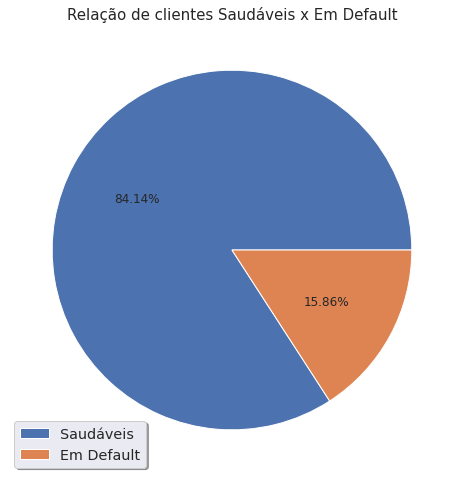

In [5]:
plot_clients_relation(df)

Como esperado, a maior parte da nossa base de dados é formada por clientes saudáveis. Podemos observar desde agora que o nosso conjunto de dados está desbalanceado.

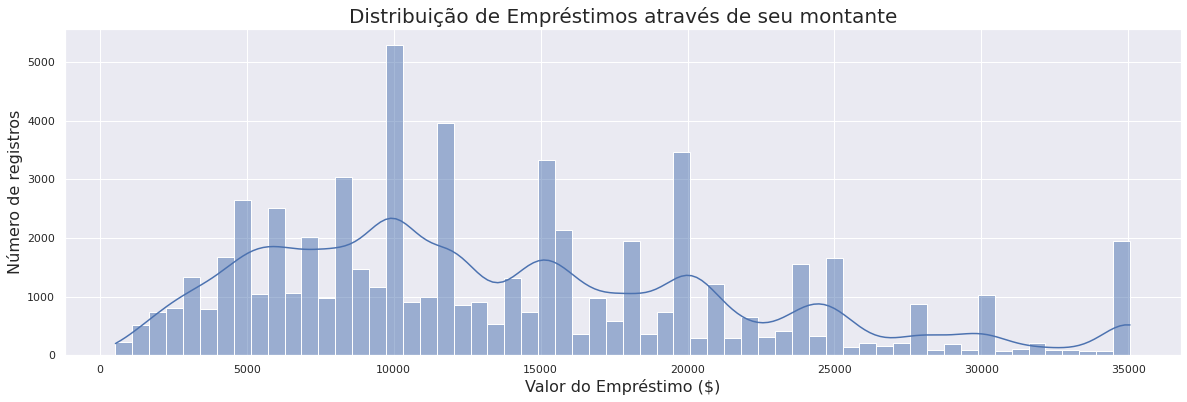

In [6]:
ax = sns.histplot(df["amount_borrowed"], kde=True)
_ = ax.figure.set_size_inches(20, 6)
_ = ax.set_title("Distribuição de Empréstimos através de seu montante", fontsize=20)
_ = ax.set_xlabel("Valor do Empréstimo ($)", fontsize=16)
_ = ax.set_ylabel("Número de registros", fontsize=16)

Através deste gráfico conseguimos visualizar que a maior parte dos empréstimos realizados naturalmente possuem valores mais baixos em comparação por exemplo com os valores mais altos registrados. O gráfico a seguir ajuda a consolidar está afirmação.

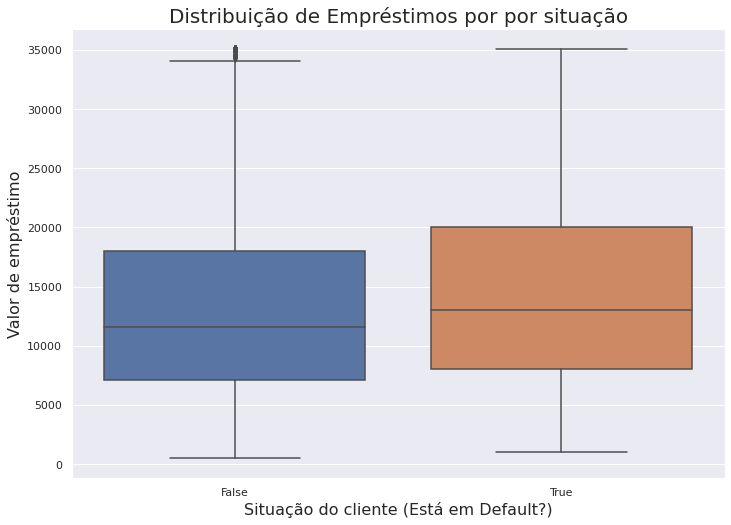

In [7]:
ax = sns.boxplot(x="default", y="amount_borrowed", data=df)
_ = ax.set_title("Distribuição de Empréstimos por por situação", fontsize=20)
_ = ax.set_xlabel("Situação do cliente (Está em Default?)", fontsize=16)
_ = ax.set_ylabel("Valor de empréstimo", fontsize=16)

Através deste gráfico, podemos visualizar que o comportamento entre empréstimos que se tornaram Default e os que não se tornaram tem uma certa semelhança. Note que ambos tem valores de mediana muito próximos (Algo entre 10k e 15k).

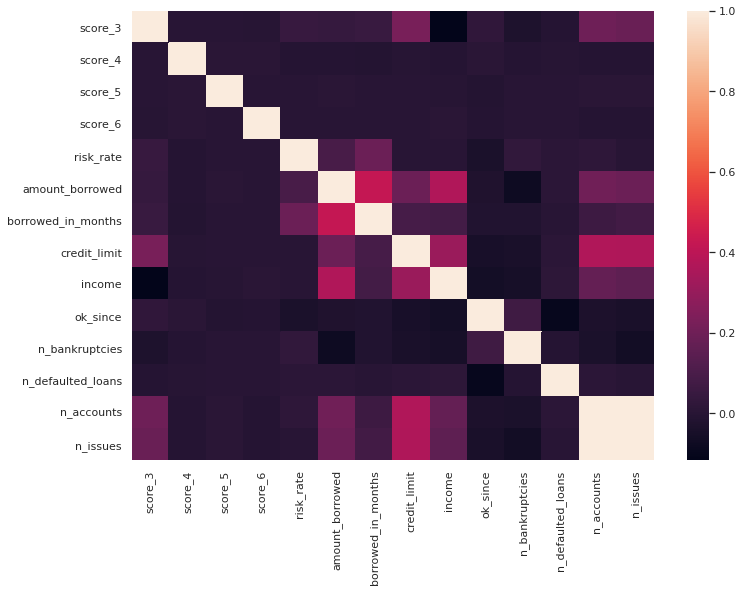

In [8]:
# Analisando a correlação entre as variáveis numéricas do nosso dataset
ax = sns.heatmap(df.corr())

Note que temos uma correlação altíssima entre as variáveis `n_accouts` e `n_issues`. Variáveis explicativas correlatas podem vir a atrapalhar o modelo final, desta forma é indicado que uma destas deve ser retirada do conjunto de dados. A princípio não temos uma escolha definida, após explorar melhor os dados poderemos tomar uma decisão mais assertiva sobre qual destas retirar.

## Pré Processamento

- Nesta seção, vamos identificar as variáveis de interesse para compor o nosso conjunto de dados final de treinamento. Além disso, vamos identificar e tratar anomalias relacionadas aos registros escolhidos.

In [9]:
def get_infos(df_, to_df=True):
    """
        Função auxiliar para capturar e estruturar algumas informações
        referentes a uma estrutura de dados. Para o resultado retornado
        temos a seguinte legenda:
            name - Nome da coluna
            type - Tipo de dados existente na coluna
            total - Número total de registros na coluna
            loss_count - Número de valores nulos na coluna
            loss_rate - Taxa de valores nulos na coluna
            unique_count - Número de valores distintos na coluna
            unique_rate - Taxa de valores distintos na coluna
    """
    response = []
    num_rows = df_.shape[0]
    
    for col in df_:
        null_values = df_.loc[df_[col].isna()].shape[0]
        unique_values = df_[col].unique().shape[0]
        if null_values > 0:
            # Caso existam valores Nulos, descontamos o mesmo
            unique_values = max(unique_values - 1, 0)

        response.append({
            "name": col,
            "type": str(df_[col].dtype),
            "total": num_rows,
            "loss_count": null_values,
            "loss_rate": round(null_values / num_rows, 4),
            "unique_count": unique_values,
            "unique_rate": round(unique_values / num_rows, 4)
        })
    
    if to_df:
        response = pd.DataFrame(response)

    return response

In [10]:
df_exploration = get_infos(df)
df_exploration

,name,type,total,loss_count,loss_rate,unique_count,unique_rate
0,ids,object,64592,0,0.0000,64592,1.0000
1,default,object,64592,4626,0.0716,2,0.0000
2,score_1,object,64592,785,0.0122,7,0.0001
3,score_2,object,64592,785,0.0122,35,0.0005
4,score_3,float64,64592,785,0.0122,88,0.0014
5,score_4,float64,64592,0,0.0000,64592,1.0000
6,score_5,float64,64592,0,0.0000,64592,1.0000
7,score_6,float64,64592,0,0.0000,64592,1.0000
8,risk_rate,float64,64592,785,0.0122,82,0.0013
9,amount_borrowed,float64,64592,785,0.0122,53348,0.8259


Através da estrutura de dados acima, podemos visualizar de forma estruturada algumas informações importantes sobre cada coluna do nosso dataframe

### Identificando valores nulos

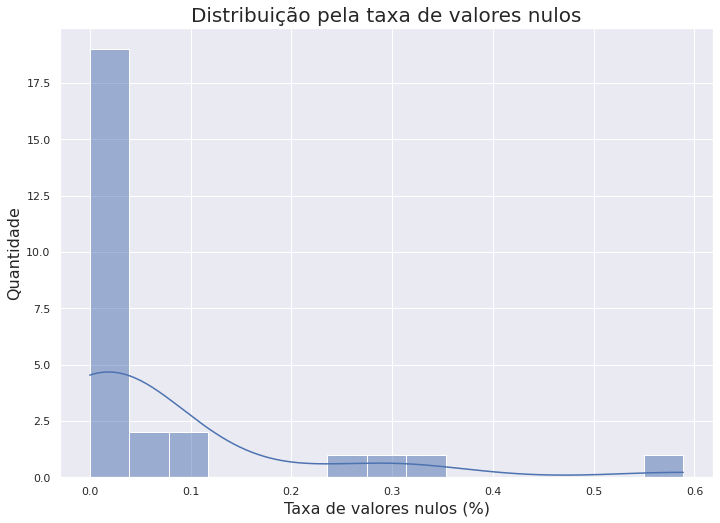

In [11]:
ax = sns.histplot(df_exploration["loss_rate"], kde=True)
_ = ax.set_title("Distribuição pela taxa de valores nulos", fontsize=20)
_ = ax.set_xlabel("Taxa de valores nulos (%)", fontsize=16)
_ = ax.set_ylabel("Quantidade", fontsize=16)

Note que, conseguimos visualizar 2 grupos isolados:

- Grupo cuja taxa de valores nulos está entre cerca de 25% e 35%
- Grupo cuja taxa de valores nulos está em cerca de 60%

Neste caso, vamos visualizar todas as colunas que possuem uma taxa de valores nulos acima de 20%

In [12]:
df_exploration.loc[df_exploration["loss_rate"] > 0.2]

,name,type,total,loss_count,loss_rate,unique_count,unique_rate
11,credit_limit,float64,64592,19753,0.3058,28259,0.4375
14,sign,object,64592,20767,0.3215,12,0.0002
22,ok_since,float64,64592,38038,0.5889,104,0.0016
26,n_issues,float64,64592,16451,0.2547,45,0.0007


Através destas duas análises, podemos tirar algumas conclusões:

- A coluna `ok_since` possui cerca de 60% de valores faltantes. Essa quantidade é muito expressiva para ser inserida de forma artificial, o que poderia influenciar negativamente o modelo inclusive. Esta coluna deve ser retirada do nosso conjunto de dados.

- A coluna `n_issues` possui cerca de 25% de valores faltantes. Este valor também é expressivo e além disso, como vimos acima, esta coluna possui uma correlação alta com `n_accounts`. Em posse desta informação podemos tomar a decisão de retirar esta coluna, o que resolve dois dos nossos problemas. Esta coluna deve ser retirada do nosso conjunto de dados.

- A coluna `sign` possui creca de 32% de valores faltantes. Essa quantidade é muito expressiva para ser inserida de forma artificial, o que poderia influenciar negativamente o modelo inclusive. Esta coluna deve ser retirada do nosso conjunto de dados.

- A coluna `credit_limit` possui creca de 30% de valores faltantes. Essa quantidade é muito expressiva para ser inserida de forma artificial, o que poderia influenciar negativamente o modelo inclusive. Analisando nosso dicionário de dados, tive a impressão que esta coluna poderia ter uma relação forte com a explicação da nossa variável `Default`, afinal se trata do limite de crédito do cliente. A fim de tentar utilizar essas informações poderiamos validar se maior parte dos registros cujo valor de `credit_limit` é nulo pertence ao conjunto de dados de valor False para default. Deste modo, bastaria excluir os registros do dataset ajudando também no equilíbro dos conjuntos de dados. Portanto, faremos mais uma análise para tomar a decisão final sobre esta coluna a seguir.


Número total de registros na base de dados: 44073
Número de clientes que não estão em Default: 34563
Número de clientes que em Default: 9510




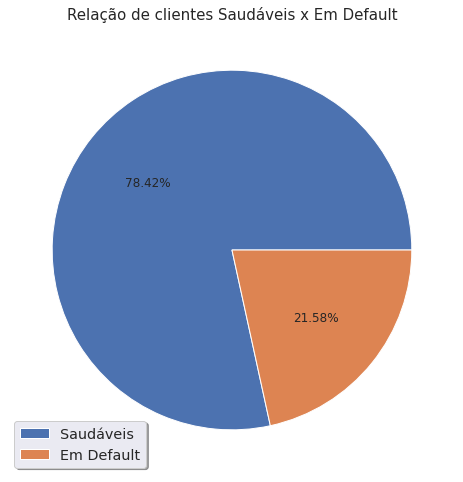

In [13]:
# Neste ponto estamos excluindo apenas os registros que possuem a coluna credit_limit nula
# e que não tenham rótulo de default True. Deste modo, além de ajudar a balancear o nosso
# banco de dados, podemos validar a utilização do limite de crédito.

df_credit_not_null = df.loc[(~df["credit_limit"].isna()) | (df["default"] == True)]
plot_clients_relation(df_credit_not_null)

Note que, já alcançamos um dos nossos objetivos de ajudar a balancear o dataset. Mas, precisamos verificar se a taxa de valores nulos ainda é muito alta para o campo `credit_limit`, para isso vamos utilizar a mesma visualização feita acima da estrutura de dados gerada.

In [14]:
df_exploration_not_null = get_infos(df_credit_not_null)
df_exploration_not_null.loc[df_exploration_not_null["name"] == "credit_limit"]

,name,type,total,loss_count,loss_rate,unique_count,unique_rate
11,credit_limit,float64,47725,2886,0.0605,28259,0.5921


Maravilha! Note que após retirarmos os registros conforme indicado acima a taxa de valores nulos da coluna `credit_limit` caiu para cerca de 6%, este valor é suficiente para podermos considerar esta coluna!

### Identificando IDs e conjuntos de rótulos muito distintos

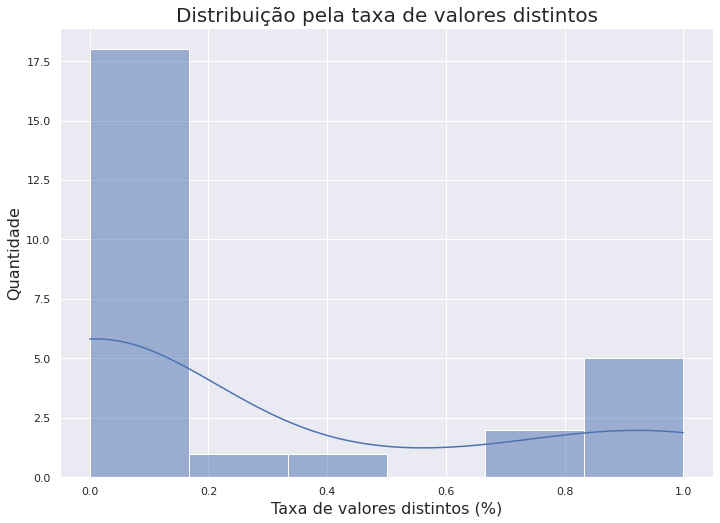

In [15]:
ax = sns.histplot(df_exploration["unique_rate"], kde=True)
_ = ax.set_title("Distribuição pela taxa de valores distintos", fontsize=20)
_ = ax.set_xlabel("Taxa de valores distintos (%)", fontsize=16)
_ = ax.set_ylabel("Quantidade", fontsize=16)

In [16]:
# Verificando se temos colunas que representam "IDs de bancos de dados" ou que não tem representação alguma

# Regras:
# Esta regra indica se existe apenas um único valor distinto para toda a coluna
rule_id = df_exploration["unique_count"] == 1
# Esta regra indica que estamos analisando apenas colunas que possuem rótulos
rule_label = df_exploration["type"] == "object"
# Esta regra indica qual a taxa de valores distintos que queremos analisar
rule_rate = df_exploration["unique_rate"] > 0.01

df_exploration.loc[
    (rule_id) | ((rule_label) & (rule_rate))
]

,name,type,total,loss_count,loss_rate,unique_count,unique_rate
0,ids,object,64592,0,0.0000,64592,1.0000
12,reason,object,64592,791,0.0122,20345,0.3150
18,zip,object,64592,785,0.0122,830,0.0128
19,channel,object,64592,785,0.0122,1,0.0000
20,job_name,object,64592,4795,0.0742,44604,0.6905


Através desta análise e observando o tipo dos dados, podemos tirar algumas conclusões:

- A coluna `ids` (Cujo tipo é não numérico) possuir todos os seus valores distintos, indicando ser apenas um índice. Desta forma, podemos excluir essa coluna das nossas análises futuras.

- A coluna `reason` possui uma taxa de valores únicos de cerca de 31%, se tratando de um conjunto de dados não numéricos isso poderia explodir a cardinalidade ao realizar o encode. Desta forma, podemos excluir esta coluna das nossas análises futuras.

- A coluna `zip`

- A coluna `channel` possui apenas um único valor distinto, note que esta coluna não influencia em nada, pois só possui um valor para todos. Desta forma, podemos excluir esta coluna das nossas análises futuras.

- A coluna `job_name` possui uma taxa de valores únicos de cerca de 70%, se tratando de um conjunto de dados não numéricos isso poderia explodir a cardinalidade ao realizar o encode. Desta forma, podemos excluir esta coluna das nossas análises futuras.


#### O valor 0.01 foi obtido através de uma série de visualizações nos dados, buscando reduzir ao máximo a dimensionalidade final

### Colunas excluídas

In [17]:
# Excluindo linhas nulas da variável que queremos prever
df = df.dropna(subset=["default"])

drop_columns = ["ok_since", "n_issues", "sign", "ids", "reason", "zip", "channel", "job_name"]
df = df.drop(drop_columns, axis=1)

# refazendo a nossa estrutura de dados de exploração
df_exploration = get_infos(df)
df_exploration

,name,type,total,loss_count,loss_rate,unique_count,unique_rate
0,default,object,59966,0,0.0000,2,0.0000
1,score_1,object,59966,0,0.0000,7,0.0001
2,score_2,object,59966,0,0.0000,35,0.0006
3,score_3,float64,59966,0,0.0000,87,0.0015
4,score_4,float64,59966,0,0.0000,59966,1.0000
5,score_5,float64,59966,0,0.0000,59966,1.0000
6,score_6,float64,59966,0,0.0000,59966,1.0000
7,risk_rate,float64,59966,0,0.0000,81,0.0014
8,amount_borrowed,float64,59966,0,0.0000,50484,0.8419
9,borrowed_in_months,float64,59966,0,0.0000,2,0.0000


Note que tivemos uma melhora signiticativa nas taxas de valores nulos após retirar apenas as linhas nulas de `credit_limit`

## Pré Processamento

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


def get_pipeline_model(model_, columns, model_name="model"):
    """
        Função auxiliar que monta o pipeline de execução do modelo
        incluindo os passos de pré processamento para cada tipo de
        dado, seja ele numérico ou categórico e finaliza com o modelo
        escolhido.
    """
    numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("normalize", MinMaxScaler())
        ]
    )

    categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("onehot-encoder", OneHotEncoder(handle_unknown="ignore"))
        ]
    )

    # Construindo o pipe completo de pre processamento
    preprocessor = ColumnTransformer(
        transformers=[
            ("numeric", numeric_transformer, columns["numeric"]),
            ("categorical", categorical_transformer, columns["categorical"])
        ]
    )

    # Finalizando o pipelina, indicando o modelo de classificação
    pipeline_model = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            (model_name, model_)
        ]
    )
    
    return pipeline_model

def prepare_dataset(df_, y_column, test_size=0.3, random_state=42):
    """
        Função auxiliar para preparar os datasets de treino e teste
        e separar as coulunas categóricas e numéricas do dataset
    """
    y = df_[y_column]
    X = df_.drop(y_column, axis=1)
    
    # Como o y só é necessário na fase de treinamento, podemos deixar o encoder
    # aqui dentro mesmo. No caso de modelos que serão realimentados, devemos
    # salvar este encoder para conseguir transformar os novos dados
    le = LabelEncoder()
    le.fit(y)
    y = le.transform(y)
    
    columns = {
        "numeric": X.select_dtypes(include=["int64", "float64"]).columns,
        "categorical": X.select_dtypes(include=["object"]).columns 
    }

    for cat_col in columns["categorical"]:
        # garante que as colunas categoricas estejam com o tipo str
        # evitando problemas com o pipeline
        X[cat_col] = X[cat_col].astype(str)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state
    )

    return (X_train, X_test, y_train, y_test), columns

### Conjuntos de Treino x Teste

In [19]:
# Separando nossos conjuntos de treino e teste
splited_dataset, columns = prepare_dataset(df, "default")

### Treinamento dos Modelos

#### Métricas

![title](img/metrics.png)

Vamos analisar os seguintes cenários:

1 -  O nosso modelo prevê que o cliente entrará em default, mas ele erra e o cliente não entra em default

2 -  O nosso modelo prevê que o cliente não entrará em default, mas ele erra e o cliente entra em default


- Ambos os casos são prejudiciais, contudo se analisarmos o caso 2 com mais cautela podemos imaginar que este cenário pode ser mais prejudicial. Note que o caso 2 indica que erramos ao prever uma fraude, portanto isso implica em prejuízo direto.


Sabendo disso, vamos propor métricas que sejam ajustadas para ambos os cenários, mas vamos também analisar métricas mais rigorosas para este cenário 2.

#### Precision

A precision leva em consideração justamente os termos que precisamos para sermos rigorosos com a análise similares ao caso 1.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, x, y, model_name):
    responses = model.predict(x)
    
    metrics = {
        "model": model_name,
        "accuracy": accuracy_score(y, responses),
        "precision": precision_score(y, responses),
        "precision_micro": precision_score(y, responses, average="micro"),
        "recall": recall_score(y, responses),
        "f1": f1_score(y, responses),
        "f1_micro": f1_score(y, responses, average="micro"),
        "f1_macro": f1_score(y, responses, average="macro")
    }
    
    return metrics

#### Modelos

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [82]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(2),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
}

In [83]:
def run_tests(classifiers, columns, splited_dataset):
    X_train, X_test, y_train, y_test = splited_dataset
    responses = []
    for c in classifiers:
        print(f"Run Test in Classifier: {c}")
        print("\tGet pipeline")
        model = get_pipeline_model(classifiers[c], columns)
        print("\tTrain model")
        model.fit(X_train, y_train)
        print("\tEvaluate model")
        metrics = evaluate_model(model, X_test, y_test, c)
        print("\tSave responses")
        responses.append(metrics)

    return pd.DataFrame(responses)

In [84]:
metrics = run_tests(classifiers, columns, splited_dataset)
metrics

Run Test in Classifier: LogisticRegression
	Get pipeline
	Train model


/home/davidm/miniconda3/envs/data/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


	Evaluate model
	Save responses
Run Test in Classifier: KNeighborsClassifier
	Get pipeline
	Train model
	Evaluate model
	Save responses
Run Test in Classifier: DecisionTreeClassifier
	Get pipeline
	Train model
	Evaluate model
	Save responses
Run Test in Classifier: RandomForestClassifier
	Get pipeline
	Train model
	Evaluate model
	Save responses
Run Test in Classifier: AdaBoostClassifier
	Get pipeline
	Train model
	Evaluate model
	Save responses
Run Test in Classifier: GradientBoostingClassifier
	Get pipeline
	Train model
	Evaluate model
	Save responses


,model,accuracy,precision,precision_micro,recall,f1,f1_micro,f1_macro
0,LogisticRegression,0.839022,0.523810,0.839022,0.049158,0.089881,0.839022,0.500791
1,KNeighborsClassifier,0.824625,0.304762,0.824625,0.066002,0.108505,0.824625,0.505626
2,DecisionTreeClassifier,0.750306,0.241086,0.750306,0.253352,0.247067,0.750306,0.548702
3,RandomForestClassifier,0.839466,0.547085,0.839466,0.041939,0.077905,0.839466,0.494993
4,AdaBoostClassifier,0.839300,0.535714,0.839300,0.046408,0.085416,0.839300,0.498663
5,GradientBoostingClassifier,0.839744,0.547445,0.839744,0.051564,0.094251,0.839744,0.503173


/home/davidm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


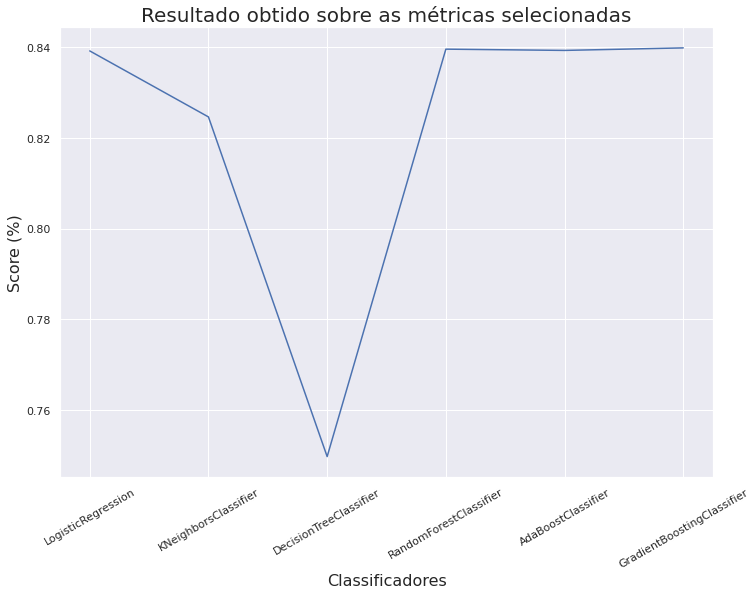

In [28]:
ax = sns.lineplot(x="model", y="precision_micro", data=metrics)
_ = ax.set_xticklabels(metrics["model"].tolist(), rotation=30)
_ = ax.set_title("Resultado obtido sobre as métricas selecionadas", fontsize=20)
_ = ax.set_xlabel("Classificadores", fontsize=16)
_ = ax.set_ylabel("Score (%)", fontsize=16)

#### Testando o AutoKeras

In [74]:
import autokeras as ak

ak_model = ak.StructuredDataClassifier(max_trials=2, overwrite=True)

In [75]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

# Preparando os dados para o AutoKeras

# Tratando colunas categóricas
categorical_columns = df[columns["categorical"]].fillna(method="ffill")

hot_encoder = OneHotEncoder()
hot_encoder.fit(categorical_columns)
sparse_categorical = hot_encoder.transform(categorical_columns)

# Tratando colunas numéricas
numeric_columns = df[columns["numeric"]]

si = SimpleImputer(missing_values=np.nan, strategy="median")
si.fit(numeric_columns)
numeric_columns = si.transform(numeric_columns)

scaler = MinMaxScaler()
scaler.fit(numeric_columns)
numeric_columns = scaler.transform(numeric_columns)

X = np.concatenate([numeric_columns, sparse_categorical.A], axis=1)

# Transformando o rótulo Default
y = df[["default"]].values.ravel()
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [76]:
X_train_ak, X_test_ak, y_train_ak, y_test_ak = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

In [77]:
ak_model.fit(X_train_ak, y_train_ak, epochs=10)

Trial 2 Complete [00h 01m 08s]
val_accuracy: 0.8468242883682251

Best val_accuracy So Far: 0.8468242883682251
Total elapsed time: 00h 02m 17s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1312/1312 [==============================] - 4s 2ms/step - loss: 0.4385 - accuracy: 0.8292
Epoch 2/10
1312/1312 [==============================] - 3s 2ms/step - loss: 0.3988 - accuracy: 0.8393
Epoch 3/10
1312/1312 [==============================] - 3s 2ms/step - loss: 0.3947 - accuracy: 0.8407
Epoch 4/10
1312/1312 [==============================] - 3s 2ms/step - loss: 0.3917 - accuracy: 0.8420
Epoch 5/10
1312/1312 [==============================] - 3s 2ms/step - loss: 0.3893 - accuracy: 0.8432
Epoch 6/10
1312/1312 [==============================] - 3s 2ms/step - loss: 0.3871 - accuracy: 0.8438
Epoch 7/10
1312/1312 [==============================] - 3s 2ms/step - loss: 0.3848 - accuracy: 0.8443
Epoch 8/10
1312/1312 [==============================] - 3s 2ms/step - loss: 0.3828 - accuracy: 0.8449
Epoc

In [ ]:
df_metrics = evaluate_model(ak_model, X_test_ak, y_test_ak, "ak_neural_network")

In [81]:
pd.DataFrame([df_metrics])

,model,accuracy,precision,precision_micro,recall,f1,f1_micro,f1_macro
0,ak_neural_network,0.836298,0.458333,0.836298,0.068065,0.118527,0.836298,0.514149


## Resultados e Discussões

### Hipótese - Será que conseguimos segmentar esses registros e obter previsões melhores com os dados segmentados?

- Motivação: Vamos supor um cenário em que o comportamento de 